<a href="https://colab.research.google.com/github/igedemadepradnyaairlangga/Dataanalitycs/blob/master/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation with k-Means Clustering**

Dibuat Oleh : RAMESH MANICKAVEL

Data diambil dari data https://www.kaggle.com/code/rameshpriyadarshanmanickavel/customer-segmentation-with-k-means-clustering

Nama Saya I Gede Made Pradnya Airlangga 
Nim : 19101219

Disini saya merunning Costomer Segmentation with K-Means Clustering 
tujuannya untuk memenuhi tugas UAS dari matakuliah Data Analitycs

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
!ls

 amazon_prime_titles.csv
'e-shop clothing 2008.csv'
'e-shop clothing 2008.csv.zip'
 kaggle.json
 Mall_Customers.csv
'Salinan amazon_prime_titles.csv'
 udemy_output_All_Finance__Accounting_p1_p626.csv


In [5]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

In [10]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
df = pd.read_csv(r'Mall_Customers.csv')

In [12]:
# Printing few rows of the data frame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Printing the number of rows & number of columns in data frame
df.shape

(200, 5)

In [15]:
# Printing data types of each column
datatypes = df.dtypes
datatypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [16]:
# Printing the information about the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
# Counting total null values in the data frame
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
# Counting null values in the data frame by rows
for i in range(len(df.index)) :
    print(" Total NaN in row", i + 1, ":",
          df.iloc[i].isnull().sum())

 Total NaN in row 1 : 0
 Total NaN in row 2 : 0
 Total NaN in row 3 : 0
 Total NaN in row 4 : 0
 Total NaN in row 5 : 0
 Total NaN in row 6 : 0
 Total NaN in row 7 : 0
 Total NaN in row 8 : 0
 Total NaN in row 9 : 0
 Total NaN in row 10 : 0
 Total NaN in row 11 : 0
 Total NaN in row 12 : 0
 Total NaN in row 13 : 0
 Total NaN in row 14 : 0
 Total NaN in row 15 : 0
 Total NaN in row 16 : 0
 Total NaN in row 17 : 0
 Total NaN in row 18 : 0
 Total NaN in row 19 : 0
 Total NaN in row 20 : 0
 Total NaN in row 21 : 0
 Total NaN in row 22 : 0
 Total NaN in row 23 : 0
 Total NaN in row 24 : 0
 Total NaN in row 25 : 0
 Total NaN in row 26 : 0
 Total NaN in row 27 : 0
 Total NaN in row 28 : 0
 Total NaN in row 29 : 0
 Total NaN in row 30 : 0
 Total NaN in row 31 : 0
 Total NaN in row 32 : 0
 Total NaN in row 33 : 0
 Total NaN in row 34 : 0
 Total NaN in row 35 : 0
 Total NaN in row 36 : 0
 Total NaN in row 37 : 0
 Total NaN in row 38 : 0
 Total NaN in row 39 : 0
 Total NaN in row 40 : 0
 Total Na

In [19]:
# Simple statistics of the data frame
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
# Data type conversion (CustomerID is stored as integer, we can convert it into string)
df['Gender'] = df['Gender'].astype('str')
df['CustomerID'] = df['CustomerID'].astype('str')
dtype = df.dtypes
dtype

CustomerID                object
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


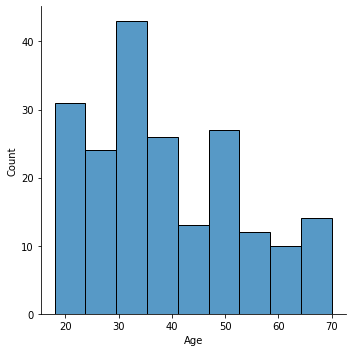

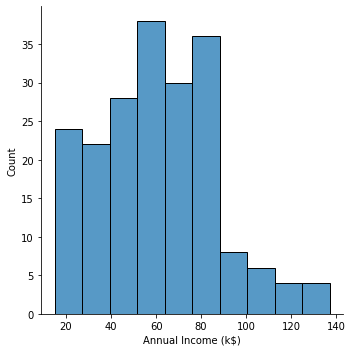

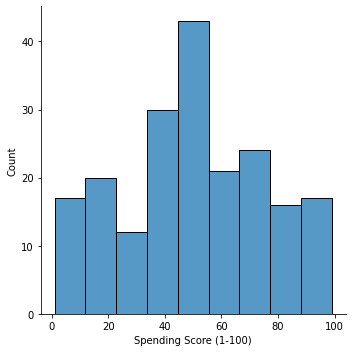

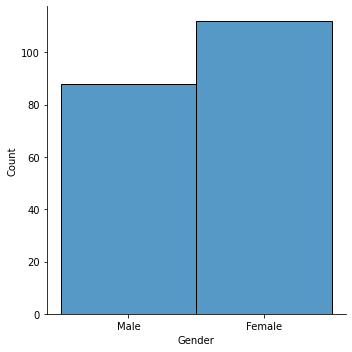

In [22]:
# Let us understand the distribution of each attributes (age, annual income & spending score)

# Distribution of age
sn.displot(data=df, x="Age", kind="hist", aspect=1)

# Distribution of Annual Income
sn.displot(data=df, x="Annual Income (k$)", kind="hist", aspect=1)


# Distribution of Spending Score
sn.displot(data=df, x="Spending Score (1-100)", kind="hist", aspect=1)

# Distribution of Gender
sn.displot(data=df, x="Gender", kind="hist", aspect=1)

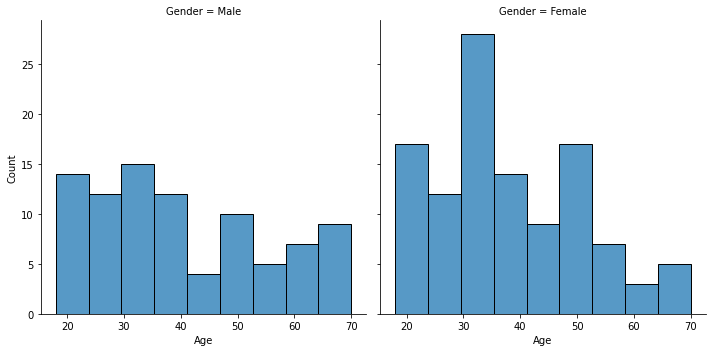

In [23]:
# Let us understand the distribution of each attributes (age) with another dimension Gender

# Distribution of age with column
sn.displot(data=df, x="Age", col="Gender", kind="hist", aspect=1)

In [24]:
# Correlation Analysis
# We can exclude CustomerID from the data frame
df = df.loc[:, df.columns != 'CustomerID']

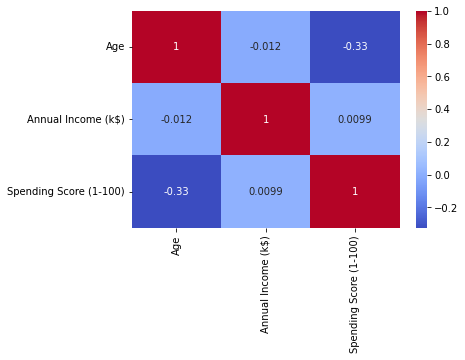

In [25]:
# Checking for correlation

# Creating a correlation matrix from the data frame
corrMatrix = df.corr()

# Plotting using heatmap
sn.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

In [26]:
# Correlation using kendall method
df.corr(method ='kendall')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.008198,-0.210757
Annual Income (k$),0.008198,1.000000,-0.000765
Spending Score (1-100),-0.210757,-0.000765,1.000000


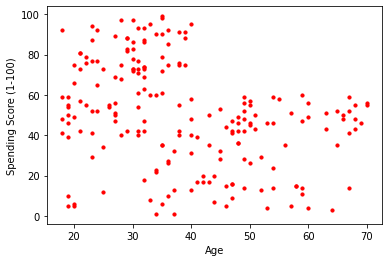

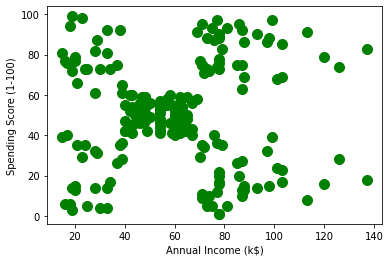

In [27]:
# Scatter plot for two variables
# plot of Age & Spending Score
df.plot.scatter(x = 'Age', y = 'Spending Score (1-100)', s = 10, c = 'red');

# plot of Annual Income & Spending Score
df.plot.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', s = 100, c = 'green');

In [28]:
# Selecting data frame only with numeric. Hence removing the 'Gender' column from data frame
df = df.loc[:, df.columns != 'Gender']

In [29]:
# distortions:  the average of the squared distances from the cluster centers of the respective clusters. 
# Inertia: the sum of squared distances of samples to their closest cluster center.

# objective: To find the optimal cluster K

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10)

for k in K:
  # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)

    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /df.shape[0]
    mapping2[k] = kmeanModel.inertia_

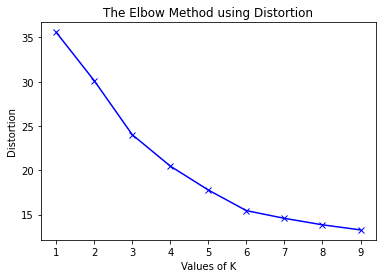

In [31]:
# Plotting the distortions to find optimal k

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

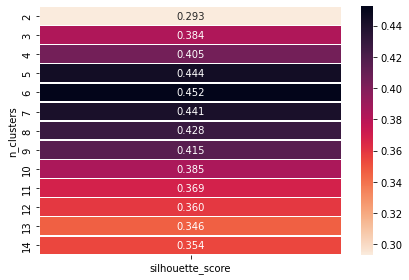

In [32]:
# Below is for identifying optimal k based on silhouette

clusters_range = range(2,15)
results =[]
for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters=c,n_init=100, random_state=0)
    cluster_lables = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_lables)
    results.append([c, silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sn.heatmap(pivot_km, annot=True, linewidths=0.5, fmt='.3f', cmap=sn.cm.rocket_r)
plt.tight_layout()

In [33]:
# With six clusters, we are segmenting the given data & attributes

kmeans_selection = KMeans(init='k-means++', n_clusters=6,n_init=100, random_state=1).fit(df)
labels = pd.DataFrame(kmeans_selection.labels_)
clustered_data = df.assign(Cluster=labels)

grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)

# Printingthe clusters
grouped_km

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,27.0,56.7,49.1
1,41.7,88.2,17.3
2,32.7,86.5,82.1
3,56.2,53.4,49.1
4,44.1,25.1,19.5
5,25.3,25.7,79.4
